In [3]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt
import copy
import math
import time

[255 255 255]


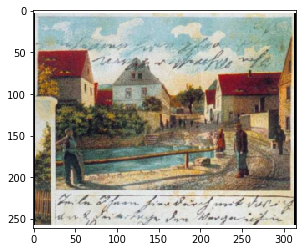

C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in ubyte_scalars


71.82644648199042


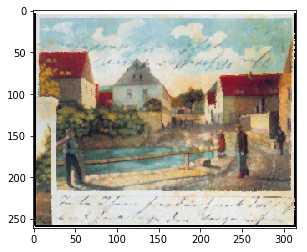

81326
81326


In [4]:
def getRegion(u,v):
    global img
    global r
    global mask
    global b
    b = b + 1
    p = []
    for i in range(0,2*r+1):
        for j in range(0,2*r+1):
            if(mask[i,j]==1):
                p.append(img[u+i-r,v+j-r])
    return p

def AggDistance(x, P):
    d = 0
    for q in P:
        d = d +abs(x[0]-q[0])+abs(x[1]-q[1])+abs(x[2]-q[2])
    return d

def fun2(x):
    global ind
    ind = x[0]
    s = list(map(fun,enumerate(x[1])))
    return s

def fun(x):
    global k
    k = k+1
    u = ind
    v = x[0]
    pctr = x[1]
    P = getRegion(u,v)
    dctr = AggDistance(pctr,P)
    dmin = math.inf
    for pi in P:
        d = AggDistance(pi,P)
        if(d < dmin):
            pmin = pi
            dmin = d
    if (dmin < dctr):
        return pmin
    else:
        return x[1]
    
def Filter(img,r):
    m= img.shape[0]
    n =img.shape[1]
    img2 = copy.copy(img)
    centr = np.array(list(map(fun2,enumerate(img[r:m-r,r:n-r])))).reshape(m-2*r,n-2*r,3)
    img2[r:m-r,r:n-r] = centr
    return img2
            
            
img =cv2.imread("C:/Users/Acer/opencvProj/home.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img[0,0])
r = 1
k = 0
b = 0
mask = np.zeros((2*r+1,2*r+1), dtype=np.uint8)
for i in range(0,2*r+1):
    for j in range(0,2*r+1):
        if((i-r)**2+(j-r)**2)<=r*r:
            mask[i,j]=1
plt.imshow(img)
plt.show()
t = time.clock()
nimg = Filter(img,r)
print(time.clock()-t)
plt.imshow(nimg)
plt.show()
print(k)
print (b)


In [111]:

mask=np.array([[0,1,0],[0,1,0]],dtype=np.uint8)
n = np.array([[12,33,56],[35,345,78]])
print(n)
p = cv2.bitwise_and(n,n,mask=mask)
print(p)

[[ 12  33  56]
 [ 35 345  78]]
[[  0  33   0]
 [  0 345   0]]


In [62]:
a = 4
A ='s'
print(a)
print(A)

4
s
